### Problem Statement : PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation

### Import Data

In [2]:
forestfires = pd.read_csv("forestfires.csv")
forestfires 

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forestfires.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


### Data Understanding

In [5]:
forestfires.shape

(517, 31)

In [6]:
forestfires.duplicated().sum()

8

In [7]:
forestfires = forestfires.drop_duplicates()
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
forestfires.shape

(509, 31)

In [9]:
forestfires.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [10]:
forestfires.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [11]:
forestfires.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,509.0,90.618075,5.555527,18.7,90.2,91.60,92.90,96.20
DMC,509.0,110.235756,63.804112,1.1,62.3,108.30,141.30,291.30
DC,509.0,547.787623,248.196222,7.9,437.7,664.20,713.90,860.60
ISI,509.0,9.023576,4.585083,0.0,6.4,8.40,11.00,56.10
temp,509.0,18.865422,5.841083,2.2,15.4,19.30,22.80,33.30
RH,509.0,44.253438,16.365192,15.0,32.0,42.00,53.00,100.00
wind,509.0,4.011395,1.800926,0.4,2.7,4.00,4.90,9.40
rain,509.0,0.020432,0.296261,0.0,0.0,0.00,0.00,6.40
area,509.0,12.992908,64.133357,0.0,0.0,0.61,6.58,1090.84
dayfri,509.0,0.163065,0.369788,0.0,0.0,0.00,0.00,1.00


In [12]:
forestfires['size_category'].unique()

array(['small', 'large'], dtype=object)

In [13]:
forestfires.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

----
### Correlation of the input variables

In [14]:
forestfires_num_data = forestfires[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]
forestfires_num_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


###  Correlation Matrix

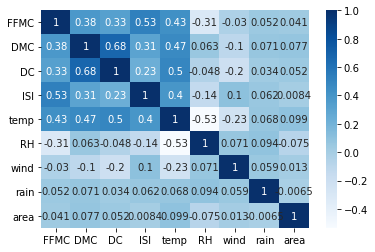

In [15]:
sns.heatmap(forestfires_num_data.corr(), annot=True, cmap = 'Blues')
plt.show()

### Data Visualization

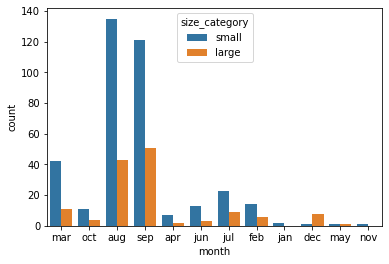

In [16]:
sns.countplot(forestfires['month'],hue=forestfires['size_category'])
plt.show()

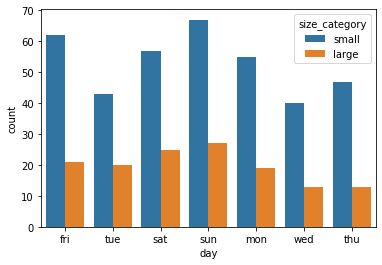

In [17]:
sns.countplot(forestfires['day'],hue=forestfires['size_category'])
plt.show()

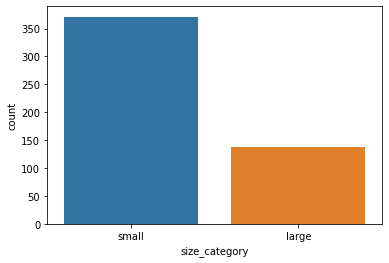

In [18]:
sns.countplot(forestfires['size_category'])
plt.show()

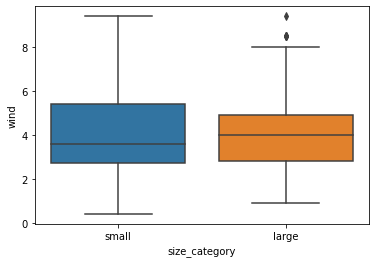

In [19]:
sns.boxplot(forestfires['size_category'],forestfires['wind'])
plt.show()

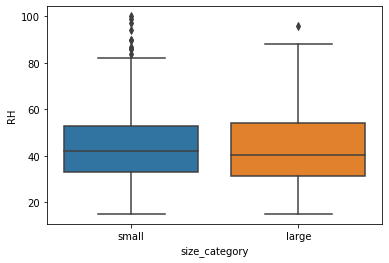

In [20]:
sns.boxplot(forestfires['size_category'],forestfires['RH'])
plt.show()

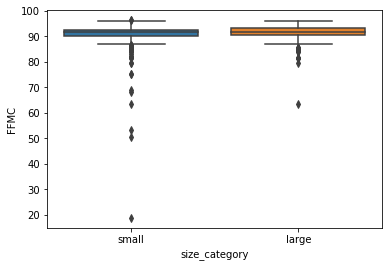

In [21]:
sns.boxplot(forestfires['size_category'],forestfires['FFMC'])
plt.show()

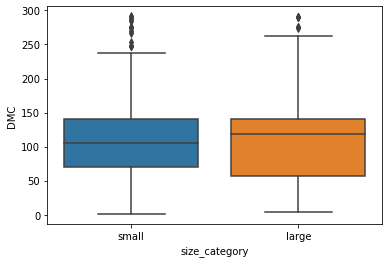

In [22]:
sns.boxplot(forestfires['size_category'],forestfires['DMC'])
plt.show()

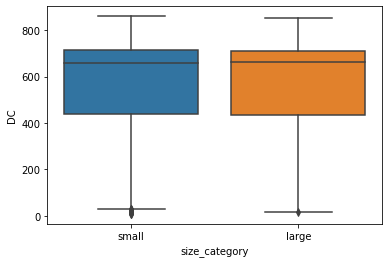

In [23]:
sns.boxplot(forestfires['size_category'],forestfires['DC'])
plt.show()

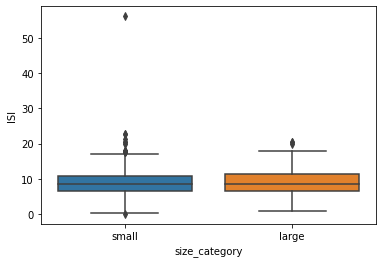

In [24]:
sns.boxplot(forestfires['size_category'],forestfires['ISI'])
plt.show()

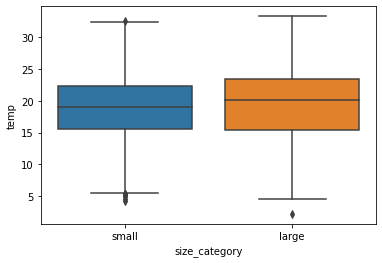

In [25]:
sns.boxplot(forestfires['size_category'],forestfires['temp'])
plt.show()

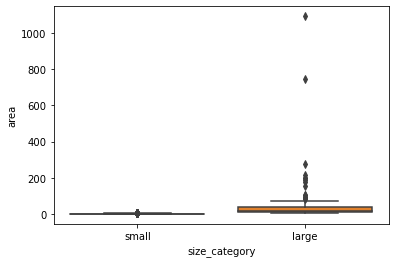

In [26]:
sns.boxplot(forestfires['size_category'],forestfires['area'])
plt.show()

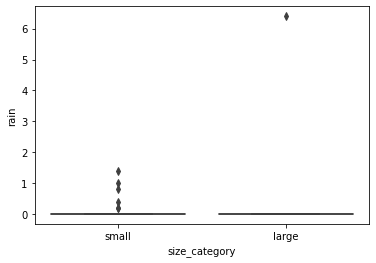

In [27]:
sns.boxplot(forestfires['size_category'],forestfires['rain'])
plt.show()

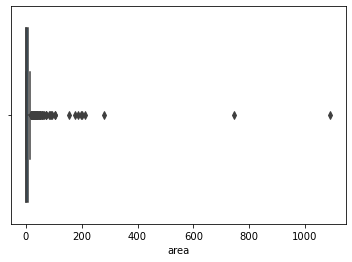

In [28]:
sns.boxplot(forestfires['area'])
plt.show()

### From above BoxPlot we can say that there are majorly 3 Outlier instances in our dataset

Skew: 12.75393973327039
Kurtosis: 191.2657222312397


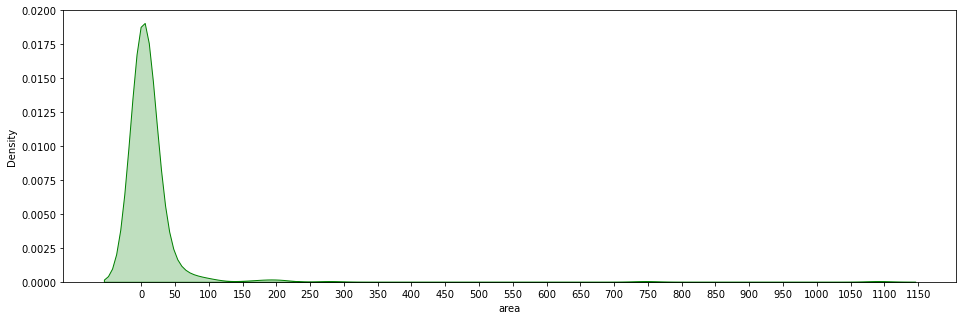

In [29]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(forestfires['area'].skew()))
print("Kurtosis: {}".format(forestfires['area'].kurtosis()))
ax = sns.kdeplot(forestfires['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

### The Data is highly skewed to the right and has large kurtosis value.
### Majority of the forest fires do not cover a large area, most of the damaged area is under 100 hectares of land.

In [30]:
forestfires['month'].value_counts()

aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [31]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [32]:
forestfires = forestfires.replace(order)
forestfires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,3,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,10,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,10,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,3,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,8,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,8,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,8,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,8,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


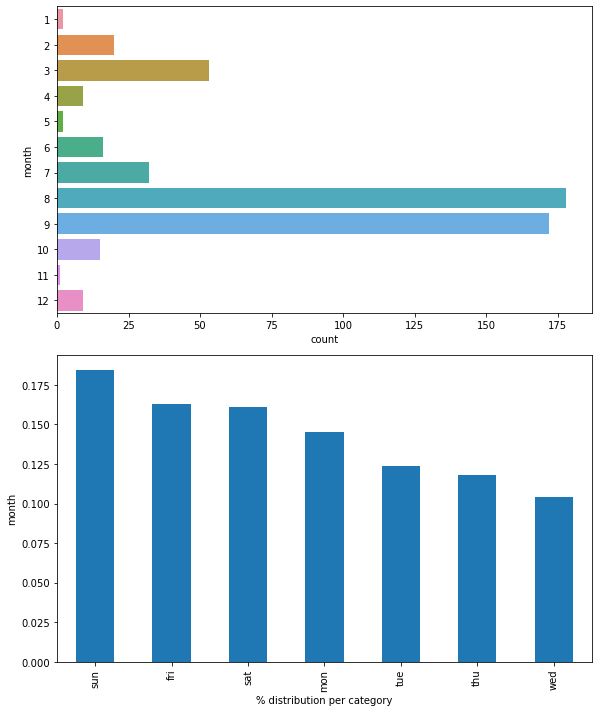

In [33]:
plt.figure(figsize=(16,10))
for i,col in enumerate(order,1):
    plt.subplot(2,2,i)
    sns.countplot(data=forestfires,y='month')
    plt.subplot(2,2,i+2)
    forestfires['day'].value_counts(normalize=True).plot.bar()
    plt.ylabel('month')
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

### Majority of the fire occurs in the months Aug (8) and Sep (9).
### For Days : Fri, Sat and Sun have recorded the most cases.


-----
### Neural Network Sequential Model

### Model Building

In [34]:
mapping = {'small': 0, 'large': 1}

In [35]:
forestfires = forestfires.replace(mapping)

In [36]:
forestfires['size_category']

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 509, dtype: int64

In [37]:
X = forestfires.drop(['day','size_category'],axis=1)
y= forestfires['size_category']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=121212,stratify = y)

In [39]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((407, 29), (407,), (102, 29), (102,))

### Data Preprocessing

In [40]:
sscalar = StandardScaler()
sscalar.fit(X_train)

StandardScaler()

In [41]:
scaled_X_train = sscalar.transform(X_train)

In [42]:
scaled_X_test = sscalar.transform(X_test)

In [43]:
#Converting Numpy arrays into DataFrame
scaled_X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)

In [44]:
scaled_X_train.shape, scaled_X_test.shape, y_train.shape, y_test.shape

((407, 29), (102, 29), (407,), (102,))

### Build the architecture
### Model 1

In [45]:
model1 = Sequential()
model1.add(Dense(12, input_dim=29, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

### Model Compilation

In [46]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Training

In [47]:
model1.fit(scaled_X_train, y_train, epochs=150, batch_size=10, validation_split=0.3)

Epoch 1/150
29/29 [==============================] - 1s 11ms/step - loss: 0.6956 - accuracy: 0.5563 - val_loss: 0.6740 - val_accuracy: 0.6016
Epoch 2/150
29/29 [==============================] - 0s 4ms/step - loss: 0.6468 - accuracy: 0.6831 - val_loss: 0.6493 - val_accuracy: 0.6667
Epoch 3/150
29/29 [==============================] - 0s 4ms/step - loss: 0.6196 - accuracy: 0.7324 - val_loss: 0.6286 - val_accuracy: 0.6829
Epoch 4/150
29/29 [==============================] - 0s 4ms/step - loss: 0.5964 - accuracy: 0.7500 - val_loss: 0.6137 - val_accuracy: 0.6992
Epoch 5/150
29/29 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7570 - val_loss: 0.6027 - val_accuracy: 0.7073
Epoch 6/150
29/29 [==============================] - 0s 3ms/step - loss: 0.5653 - accuracy: 0.7676 - val_loss: 0.5959 - val_accuracy: 0.7073
Epoch 7/150
29/29 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7746 - val_loss: 0.5893 - val_accuracy: 0.7073
Epoch 8/150


Epoch 59/150
29/29 [==============================] - 0s 3ms/step - loss: 0.2444 - accuracy: 0.9014 - val_loss: 0.5286 - val_accuracy: 0.8374
Epoch 60/150
29/29 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.8873 - val_loss: 0.5300 - val_accuracy: 0.8293
Epoch 61/150
29/29 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.8979 - val_loss: 0.5365 - val_accuracy: 0.8455
Epoch 62/150
29/29 [==============================] - 0s 3ms/step - loss: 0.2338 - accuracy: 0.9014 - val_loss: 0.5197 - val_accuracy: 0.8374
Epoch 63/150
29/29 [==============================] - 0s 4ms/step - loss: 0.2274 - accuracy: 0.8979 - val_loss: 0.5290 - val_accuracy: 0.8374
Epoch 64/150
29/29 [==============================] - 0s 4ms/step - loss: 0.2241 - accuracy: 0.8979 - val_loss: 0.5289 - val_accuracy: 0.8374
Epoch 65/150
29/29 [==============================] - 0s 3ms/step - loss: 0.2195 - accuracy: 0.9049 - val_loss: 0.5311 - val_accuracy: 0.8374
Epoch 

29/29 [==============================] - 0s 4ms/step - loss: 0.0678 - accuracy: 0.9859 - val_loss: 0.6234 - val_accuracy: 0.8862
Epoch 117/150
29/29 [==============================] - 0s 4ms/step - loss: 0.0670 - accuracy: 0.9824 - val_loss: 0.6245 - val_accuracy: 0.8780
Epoch 118/150
29/29 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9859 - val_loss: 0.6359 - val_accuracy: 0.8780
Epoch 119/150
29/29 [==============================] - 0s 3ms/step - loss: 0.0622 - accuracy: 0.9824 - val_loss: 0.6307 - val_accuracy: 0.8862
Epoch 120/150
29/29 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9859 - val_loss: 0.6286 - val_accuracy: 0.8780
Epoch 121/150
29/29 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9894 - val_loss: 0.6311 - val_accuracy: 0.8780
Epoch 122/150
29/29 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9894 - val_loss: 0.6300 - val_accuracy: 0.8862
Epoch 123/150

### Model Accuracy

In [48]:
_, accuracy = model1.evaluate(scaled_X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.9656
Accuracy: 96.56


In [49]:
_, accuracy = model1.evaluate(scaled_X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8529
Accuracy: 85.29


### Build the architecture
### Model 2

In [50]:
model2=Sequential()
model2.add(Dense(12,input_dim=29,activation='sigmoid'))
model2.add(Dense(8,activation='sigmoid'))
model2.add(Dense(1,activation='relu'))

### Model Compilation

In [51]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Model Training

In [52]:
model2.fit(scaled_X_train, y_train, validation_split=0.3, epochs=100, batch_size=15)

Epoch 1/100
19/19 [==============================] - 1s 12ms/step - loss: 0.6656 - accuracy: 0.6585 - val_loss: 0.6310 - val_accuracy: 0.7073
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6366 - accuracy: 0.7394 - val_loss: 0.6234 - val_accuracy: 0.7073
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6214 - accuracy: 0.7394 - val_loss: 0.6173 - val_accuracy: 0.7073
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6105 - accuracy: 0.7394 - val_loss: 0.6126 - val_accuracy: 0.7073
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6042 - accuracy: 0.7394 - val_loss: 0.6086 - val_accuracy: 0.7073
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5963 - accuracy: 0.7394 - val_loss: 0.6061 - val_accuracy: 0.7073
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.7394 - val_loss: 0.6038 - val_accuracy: 0.7073
Epoch 8/100


Epoch 59/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.7887 - val_loss: 0.6541 - val_accuracy: 0.7561
Epoch 60/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.7887 - val_loss: 0.7358 - val_accuracy: 0.7561
Epoch 61/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.7958 - val_loss: 0.7318 - val_accuracy: 0.7561
Epoch 62/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.7887 - val_loss: 0.7345 - val_accuracy: 0.7561
Epoch 63/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4288 - accuracy: 0.7923 - val_loss: 0.7262 - val_accuracy: 0.7561
Epoch 64/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.7887 - val_loss: 0.7277 - val_accuracy: 0.7561
Epoch 65/100
19/19 [==============================] - 0s 3ms/step - loss: 0.4242 - accuracy: 0.7958 - val_loss: 0.7229 - val_accuracy: 0.7561
Epoch 

### Model Accuracy

In [53]:
_, accuracy = model2.evaluate(scaled_X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8256
Accuracy: 82.56


In [54]:
_, accuracy = model2.evaluate(scaled_X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.5391 - accuracy: 0.7843
Accuracy: 78.43


### Build the architecture
### Model 3

In [55]:
model3=Sequential()
model3.add(Dense(12,input_dim=29,activation='relu'))
model3.add(Dense(8,activation='relu'))
model3.add(Dense(1,activation='relu'))

### Model Compilation

In [56]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Model Training

In [57]:
model3.fit(scaled_X_train,y_train,epochs=100, validation_split=0.3,batch_size=15)

Epoch 1/100
19/19 [==============================] - 1s 12ms/step - loss: 5.8040 - accuracy: 0.4155 - val_loss: 5.4836 - val_accuracy: 0.4472
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 5.6045 - accuracy: 0.4261 - val_loss: 5.3669 - val_accuracy: 0.4553
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 5.5305 - accuracy: 0.4507 - val_loss: 5.0600 - val_accuracy: 0.4634
Epoch 4/100
19/19 [==============================] - 0s 3ms/step - loss: 5.3837 - accuracy: 0.4542 - val_loss: 5.0213 - val_accuracy: 0.4553
Epoch 5/100
19/19 [==============================] - 0s 3ms/step - loss: 5.1012 - accuracy: 0.4824 - val_loss: 4.6766 - val_accuracy: 0.4715
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 4.5369 - accuracy: 0.4789 - val_loss: 4.5625 - val_accuracy: 0.4959
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 4.4226 - accuracy: 0.4965 - val_loss: 4.2287 - val_accuracy: 0.5041
Epoch 8/100


Epoch 59/100
19/19 [==============================] - 0s 4ms/step - loss: 1.1020 - accuracy: 0.7746 - val_loss: 0.9244 - val_accuracy: 0.7073
Epoch 60/100
19/19 [==============================] - 0s 4ms/step - loss: 1.0995 - accuracy: 0.7746 - val_loss: 0.9250 - val_accuracy: 0.7073
Epoch 61/100
19/19 [==============================] - 0s 4ms/step - loss: 1.0974 - accuracy: 0.7782 - val_loss: 0.9268 - val_accuracy: 0.7073
Epoch 62/100
19/19 [==============================] - 0s 4ms/step - loss: 1.0951 - accuracy: 0.7782 - val_loss: 0.9289 - val_accuracy: 0.7073
Epoch 63/100
19/19 [==============================] - 0s 3ms/step - loss: 1.0929 - accuracy: 0.7782 - val_loss: 0.9302 - val_accuracy: 0.7073
Epoch 64/100
19/19 [==============================] - 0s 4ms/step - loss: 1.0907 - accuracy: 0.7782 - val_loss: 0.9342 - val_accuracy: 0.7154
Epoch 65/100
19/19 [==============================] - 0s 4ms/step - loss: 1.0885 - accuracy: 0.7782 - val_loss: 0.9395 - val_accuracy: 0.7154
Epoch 

### Model Accuracy

In [58]:
_, accuracy = model3.evaluate(scaled_X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 1ms/step - loss: 1.0339 - accuracy: 0.7690
Accuracy: 76.90


In [59]:
_, accuracy = model3.evaluate(scaled_X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 2ms/step - loss: 1.4354 - accuracy: 0.7745
Accuracy: 77.45


### Build the architecture
### Model 4

In [60]:
model4=Sequential()
model4.add(Dense(12,input_dim=29,activation='relu'))
model4.add(Dense(8,activation='relu'))
model4.add(Dense(1,activation='relu'))

### Model Compilation

In [61]:
model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Model Training

In [62]:
model4.fit(scaled_X_train,y_train,epochs=150, validation_split=0.3,batch_size=10)

Epoch 1/150
29/29 [==============================] - 1s 6ms/step - loss: 3.1969 - accuracy: 0.6866 - val_loss: 2.5629 - val_accuracy: 0.6992
Epoch 2/150
29/29 [==============================] - 0s 2ms/step - loss: 2.6631 - accuracy: 0.7324 - val_loss: 2.5556 - val_accuracy: 0.7154
Epoch 3/150
29/29 [==============================] - 0s 2ms/step - loss: 2.4785 - accuracy: 0.7606 - val_loss: 2.6661 - val_accuracy: 0.7154
Epoch 4/150
29/29 [==============================] - 0s 2ms/step - loss: 2.4057 - accuracy: 0.7535 - val_loss: 2.8364 - val_accuracy: 0.7154
Epoch 5/150
29/29 [==============================] - 0s 2ms/step - loss: 2.3432 - accuracy: 0.7570 - val_loss: 2.7921 - val_accuracy: 0.7236
Epoch 6/150
29/29 [==============================] - 0s 2ms/step - loss: 2.3285 - accuracy: 0.7570 - val_loss: 2.7502 - val_accuracy: 0.7317
Epoch 7/150
29/29 [==============================] - 0s 2ms/step - loss: 2.3185 - accuracy: 0.7570 - val_loss: 2.6826 - val_accuracy: 0.7317
Epoch 8/150
2

Epoch 59/150
29/29 [==============================] - 0s 3ms/step - loss: 1.0545 - accuracy: 0.8697 - val_loss: 1.6030 - val_accuracy: 0.8049
Epoch 60/150
29/29 [==============================] - 0s 3ms/step - loss: 1.0541 - accuracy: 0.8662 - val_loss: 1.6024 - val_accuracy: 0.8049
Epoch 61/150
29/29 [==============================] - 0s 3ms/step - loss: 1.0502 - accuracy: 0.8732 - val_loss: 1.6009 - val_accuracy: 0.8049
Epoch 62/150
29/29 [==============================] - 0s 3ms/step - loss: 1.0475 - accuracy: 0.8732 - val_loss: 1.6005 - val_accuracy: 0.8130
Epoch 63/150
29/29 [==============================] - 0s 3ms/step - loss: 1.0461 - accuracy: 0.8697 - val_loss: 1.6008 - val_accuracy: 0.8049
Epoch 64/150
29/29 [==============================] - 0s 4ms/step - loss: 1.0432 - accuracy: 0.8697 - val_loss: 1.5955 - val_accuracy: 0.8049
Epoch 65/150
29/29 [==============================] - 0s 4ms/step - loss: 1.0411 - accuracy: 0.8873 - val_loss: 1.5985 - val_accuracy: 0.8130
Epoch 

29/29 [==============================] - 0s 3ms/step - loss: 0.9619 - accuracy: 0.9225 - val_loss: 1.5557 - val_accuracy: 0.8130
Epoch 117/150
29/29 [==============================] - 0s 3ms/step - loss: 0.9638 - accuracy: 0.9225 - val_loss: 1.5482 - val_accuracy: 0.8211
Epoch 118/150
29/29 [==============================] - 0s 5ms/step - loss: 0.9633 - accuracy: 0.9296 - val_loss: 1.5514 - val_accuracy: 0.8130
Epoch 119/150
29/29 [==============================] - 0s 4ms/step - loss: 0.9607 - accuracy: 0.9261 - val_loss: 1.6617 - val_accuracy: 0.8211
Epoch 120/150
29/29 [==============================] - 0s 6ms/step - loss: 0.9609 - accuracy: 0.9225 - val_loss: 1.5503 - val_accuracy: 0.8049
Epoch 121/150
29/29 [==============================] - 0s 3ms/step - loss: 0.9593 - accuracy: 0.9296 - val_loss: 1.6557 - val_accuracy: 0.8049
Epoch 122/150
29/29 [==============================] - 0s 4ms/step - loss: 0.9590 - accuracy: 0.9261 - val_loss: 1.5660 - val_accuracy: 0.8130
Epoch 123/150

### Model Accuracy

In [65]:
_, accuracy = model4.evaluate(scaled_X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

13/13 [==============================] - 0s 1ms/step - loss: 1.1892 - accuracy: 0.9017
Accuracy: 90.17


In [66]:
_, accuracy = model4.evaluate(scaled_X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 0s 2ms/step - loss: 1.9174 - accuracy: 0.8333
Accuracy: 83.33


### Conclusion : Model 1 gives the best accuracy of 85% and a loss of 0.42